<a href="https://colab.research.google.com/github/rohandawar/-daysforcoding/blob/main/Text_Extraction_From_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this notebook, I am trying to extract text from a image uaing python Tesseract Library.

The following actions would be performed in this notebook.

1. Install Testseract Library
2. Get/load the Data (Image from which Data needs to be extracted) 




In [2]:
from IPython.display import clear_output

In [3]:
!pip install pytesseract
clear_output()

In [4]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev
clear_output()

In [5]:
# Import Libs
from PIL import Image
import pytesseract
import cv2
import numpy as np
import re
import requests
from pytesseract import Output

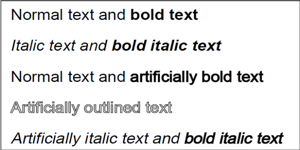

In [6]:
# Read the image from URL (In this case I searched the image on internet & then uploaded on Post Image)
image = Image.open(requests.get('https://i.postimg.cc/zfNp89ZM/Sample-Image-Text.png', stream=True).raw)
image = image.resize((300,150))
image.save('sample.png')
image

In [7]:
# Simply extracting the text
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image,config = custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



In [8]:
# Extracting text from image and removing  
try:
  text = pytesseract.image_to_string(image, lang='eng')
  character_to_remove = "!()@-*>+-/,'#%$&^_~"
  new_string = text
  for character in character_to_remove:
    new_string = new_string.replace(character,"")
  print(new_string)
except IOError as e:
  print('Error (%s).'%e)

 

Normal text and bold text

Italic text and bold italic text
Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



In [9]:
# Now we will perform opencv operations to get text from complex images
image = cv2.imread('sample.png')

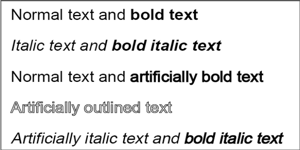

In [10]:
# Get grayscale image
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = get_grayscale(image)
Image.fromarray(gray)

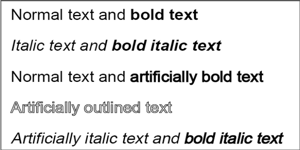

In [13]:
# noise removal
def remove_noise(image):
  return cv2.medianBlur(image,5)

noise = remove_noise(gray)
Image.fromarray(gray)

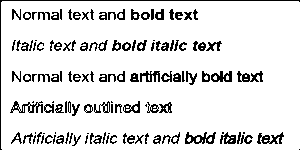

In [15]:
# Threshold
def thresholding(image):
  return cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)